In [3]:
csvfile = "dataV2_cohortV3.csv"

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)  # Show full content in each cell

In [5]:
df = pd.read_csv(csvfile)

In [6]:
# Mapping the variables to numeric values
mapping_dict = {
    'WELLNESS_malach_pines_burnout_measure_depressed': {
        'Never': 0,
        'Almost never': 1,
        'Rarely': 2,
        'Sometimes': 3,
        'Very Often': 4,
        'Always': 5
    }
}

In [7]:
# Map values and rename

# Create columns for OnlineGames and SocialFriends with 'C' (text) and numeric values
df['OnlineGamesC'] = df['CONNECTION_activities_onlinegames_p3m']

df['WalkWithSomeoneC'] = df['CONNECTION_activities_walk_p3m']

# Create 'Depression' column with numeric values only
df['DepressionC'] = df['WELLNESS_malach_pines_burnout_measure_depressed']
df['DepressionN'] = df['WELLNESS_malach_pines_burnout_measure_depressed'].map(mapping_dict['WELLNESS_malach_pines_burnout_measure_depressed'])



# Drop the original columns from df
keep_cols = ['OnlineGamesC', 'WalkWithSomeoneC', 'DepressionC', 'DepressionN']
df = df[keep_cols]

In [8]:
# Drop NA
df = df.dropna()

In [9]:
# Reorder the categories for OnlineGamesC to make "Not in the past three months" the reference category
df['OnlineGamesC'] = pd.Categorical(df['OnlineGamesC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                           ordered=True)

# Reorder the categories for SocialFriendsC to make "No time" the reference category
df['WalkWithSomeoneC'] = pd.Categorical(df['WalkWithSomeoneC'],
                                           categories=['Not in the past three months', 'Less than monthly', 'Monthly', 
                                                       'A few times a month', 'Weekly', 'A few times a week', 
                                                       'Daily or almost daily'],
                                            ordered=True)


In [10]:
df["OnlineGamesB"] = df["OnlineGamesC"] != 'Not in the past three months'
df['WalkWithSomeoneB'] = df['WalkWithSomeoneC'] != 'Not in the past three months'

In [11]:
df

,OnlineGamesC,WalkWithSomeoneC,DepressionC,DepressionN,OnlineGamesB,WalkWithSomeoneB
0,Not in the past three months,Daily or almost daily,Rarely,2.0,False,True
1,Not in the past three months,A few times a week,Almost never,1.0,False,True
2,Not in the past three months,A few times a month,Almost never,1.0,False,True
3,Weekly,Less than monthly,Rarely,2.0,True,True
4,Weekly,Monthly,Almost never,1.0,True,True
...,...,...,...,...,...,...
844,Not in the past three months,Less than monthly,Always,5.0,False,True
845,Not in the past three months,A few times a week,Very Often,4.0,False,True
846,Not in the past three months,A few times a week,Always,5.0,False,True
847,Not in the past three months,A few times a week,Sometimes,3.0,False,True


In [12]:
# Fit the OLS model using categorical values (OnlineGamesC and SocialFriendsC)
ols_model_c = smf.ols("DepressionN ~ C(OnlineGamesC) * C(WalkWithSomeoneC)", data=df)

fitted_ols_model_c = ols_model_c.fit()
# Display the regression results
fitted_ols_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.480
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0217
Time:                        22:48:59   Log-Likelihood:                -1152.3
No. Observations:                 692   AIC:                             2403.
Df Residuals:                     643   BIC:                             2625.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 2.5546      0.122     21.001      0.000       2.316       2.793
C(OnlineGamesC)[T.Less than monthly]                                                      0.1954      0.675      0.290      0.772      -1.129       1.520
C(OnlineGamesC)[T.Monthly]                                                                1.4454      1.333      1.085      0.278      -1.171       4.062
C(OnlineGamesC)[T.A few times a month]                                                    1.7787      0.776      2.293      0.022       0.255       3.302
C(OnlineGamesC)[T.Weekly]                                                                 0.6454      0.606      1.065      0.287      -0.544       1.835
C(OnlineGamesC)[T.A few times a week]                                                     0.7787      0.776      1.004      0.316      -0.745       2.302
C(OnlineGamesC)[T.Daily or almost daily]                                                  0.6329      0.353      1.791      0.074      -0.061       1.327
C(WalkWithSomeoneC)[T.Less than monthly]                                                  0.1173      0.206      0.570      0.569      -0.287       0.521
C(WalkWithSomeoneC)[T.Monthly]                                                           -0.0435      0.232     -0.187      0.851      -0.500       0.413
C(WalkWithSomeoneC)[T.A few times a month]                                               -0.1683      0.187     -0.902      0.367      -0.535       0.198
C(WalkWithSomeoneC)[T.Weekly]                                                            -0.6510      0.190     -3.430      0.001      -1.024      -0.278
C(WalkWithSomeoneC)[T.A few times a week]                                                -0.4154      0.193     -2.157      0.031      -0.794      -0.037
C(WalkWithSomeoneC)[T.Daily or almost daily]                                             -0.7927      0.238     -3.328      0.001      -1.260      -0.325
C(OnlineGamesC)[T.Less than monthly]:C(WalkWithSomeoneC)[T.Less than monthly]             0.0077      0.838      0.009      0.993      -1.638       1.654
C(OnlineGamesC)[T.Monthly]:C(WalkWithSomeoneC)[T.Less than monthly]                      -0.6173      1.638     -0.377      0.706      -3.834       2.600
C(OnlineGamesC)[T.A few times a month]:C(WalkWithSomeoneC)[T.Less than monthly]          -1.4506      1.103     -1.315      0.189      -3.616       0.715
C(OnlineGamesC)[T.Weekly]:C(WalkWithSomeoneC)[T.Less than monthly]                       -1.0673      0.914     -1.168      0.243      -2.861       0.727
C(O

In [13]:
summary = fitted_ols_model_c.summary()

# The summary is a text object, so we need to extract the coefficients and p-values from it
# We can use the summary.tables[1] for extracting the coefficient table
summary_lines = summary.tables[1].data

# Convert the summary table into a DataFrame
summary_df = pd.DataFrame(summary_lines[1:], columns=summary_lines[0])

# Convert the p-values to float type and filter
summary_df['P>|t|'] = summary_df['P>|t|'].astype(float)
filtered_summary = summary_df[summary_df['P>|t|'] <= 0.05]

# Show the filtered summary
filtered_summary

,,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,2.5546,0.122,21.001,0.000,2.316,2.793
3,C(OnlineGamesC)[T.A few times a month],1.7787,0.776,2.293,0.022,0.255,3.302
10,C(WalkWithSomeoneC)[T.Weekly],-0.6510,0.190,-3.430,0.001,-1.024,-0.278
11,C(WalkWithSomeoneC)[T.A few times a week],-0.4154,0.193,-2.157,0.031,-0.794,-0.037
12,C(WalkWithSomeoneC)[T.Daily or almost daily],-0.7927,0.238,-3.328,0.001,-1.260,-0.325
21,C(OnlineGamesC)[T.A few times a month]:C(WalkWithSomeoneC)[T.Monthly],-2.4898,0.997,-2.498,0.013,-4.447,-0.533
24,C(OnlineGamesC)[T.Daily or almost daily]:C(WalkWithSomeoneC)[T.Monthly],-1.6440,0.777,-2.115,0.035,-3.170,-0.118
27,C(OnlineGamesC)[T.A few times a month]:C(WalkWithSomeoneC)[T.A few times a month],-1.9651,0.987,-1.991,0.047,-3.903,-0.027


In [14]:
coefficients = filtered_summary['coef'].astype(float)
intercept = coefficients[0]

values = intercept + coefficients
values.loc[0] = intercept

values_rounded = values.astype(int)

depression_values = [list(mapping_dict["WELLNESS_malach_pines_burnout_measure_depressed"].keys())[value] for value in values_rounded]

pd.set_option('display.max_colwidth', None)  # Show full content in each cell

filtered_summary = filtered_summary.assign(value=values, depression_value=depression_values)
filtered_summary

,,coef,std err,t,P>|t|,[0.025,0.975],value,depression_value
0,Intercept,2.5546,0.122,21.001,0.000,2.316,2.793,2.5546,Rarely
3,C(OnlineGamesC)[T.A few times a month],1.7787,0.776,2.293,0.022,0.255,3.302,4.3333,Very Often
10,C(WalkWithSomeoneC)[T.Weekly],-0.6510,0.190,-3.430,0.001,-1.024,-0.278,1.9036,Almost never
11,C(WalkWithSomeoneC)[T.A few times a week],-0.4154,0.193,-2.157,0.031,-0.794,-0.037,2.1392,Rarely
12,C(WalkWithSomeoneC)[T.Daily or almost daily],-0.7927,0.238,-3.328,0.001,-1.260,-0.325,1.7619,Almost never
21,C(OnlineGamesC)[T.A few times a month]:C(WalkWithSomeoneC)[T.Monthly],-2.4898,0.997,-2.498,0.013,-4.447,-0.533,0.0648,Never
24,C(OnlineGamesC)[T.Daily or almost daily]:C(WalkWithSomeoneC)[T.Monthly],-1.6440,0.777,-2.115,0.035,-3.170,-0.118,0.9106,Never
27,C(OnlineGamesC)[T.A few times a month]:C(WalkWithSomeoneC)[T.A few times a month],-1.9651,0.987,-1.991,0.047,-3.903,-0.027,0.5895,Never


In [33]:
import plotly.express as px

# Create the bar plot using Plotly
fig = px.bar(filtered_summary, x='', y='value', 
             labels={'coef': 'Independent Variables', 'value': 'How often depressed'},
             title='')


fig.update_layout(
    xaxis_title='',  # Blank x-axis label
    xaxis_tickangle=20,  # Rotate labels for better readability
    xaxis_tickfont=dict(size=10),  # Make the x-axis text smaller
    width=1200,  # Adjust figure width
    height=800  # Adjust figure height
)

# Show the plot
fig.show()


In [13]:
# Fit the OLS model using categorical values (OnlineGamesB and SocialFriendsC)
# Binary values for online games
ols_model_b = smf.ols("DepressionN ~ C(OnlineGamesB) + C(WalkWithSomeoneB)", data=df)

fitted_ols_model_b = ols_model_b.fit()

# Display the regression results
fitted_ols_model_b.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DepressionN   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     8.634
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           0.000198
Time:                        21:32:13   Log-Likelihood:                -1180.0
No. Observations:                 692   AIC:                             2366.
Df Residuals:                     689   BIC:                             2380.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.6584      0.111     23.863      0.000       2.440       2.877
C(OnlineGamesB)[T.True]         0.2371      0.117      2.018      0.044       0.006       0.468
C(WalkWithSomeoneB)[T.True]    -0.4572      0.123     -3.720      0.000      -0.699      -0.216
==============================================================================
Omnibus:                       19.143   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.437
Skew:                          -0.096   Prob(JB):                      0.00541
Kurtosis:                       2.430   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(553, 139)

In [15]:
clf = DecisionTreeClassifier(max_depth=7, random_state=10)

y_train = train_df['DepressionC']
X_train = pd.get_dummies(train_df[['OnlineGamesC', 'WalkWithSomeoneC']])

y_test = test_df['DepressionC']
X_test = pd.get_dummies(test_df[['OnlineGamesC', 'WalkWithSomeoneC']])

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=10)

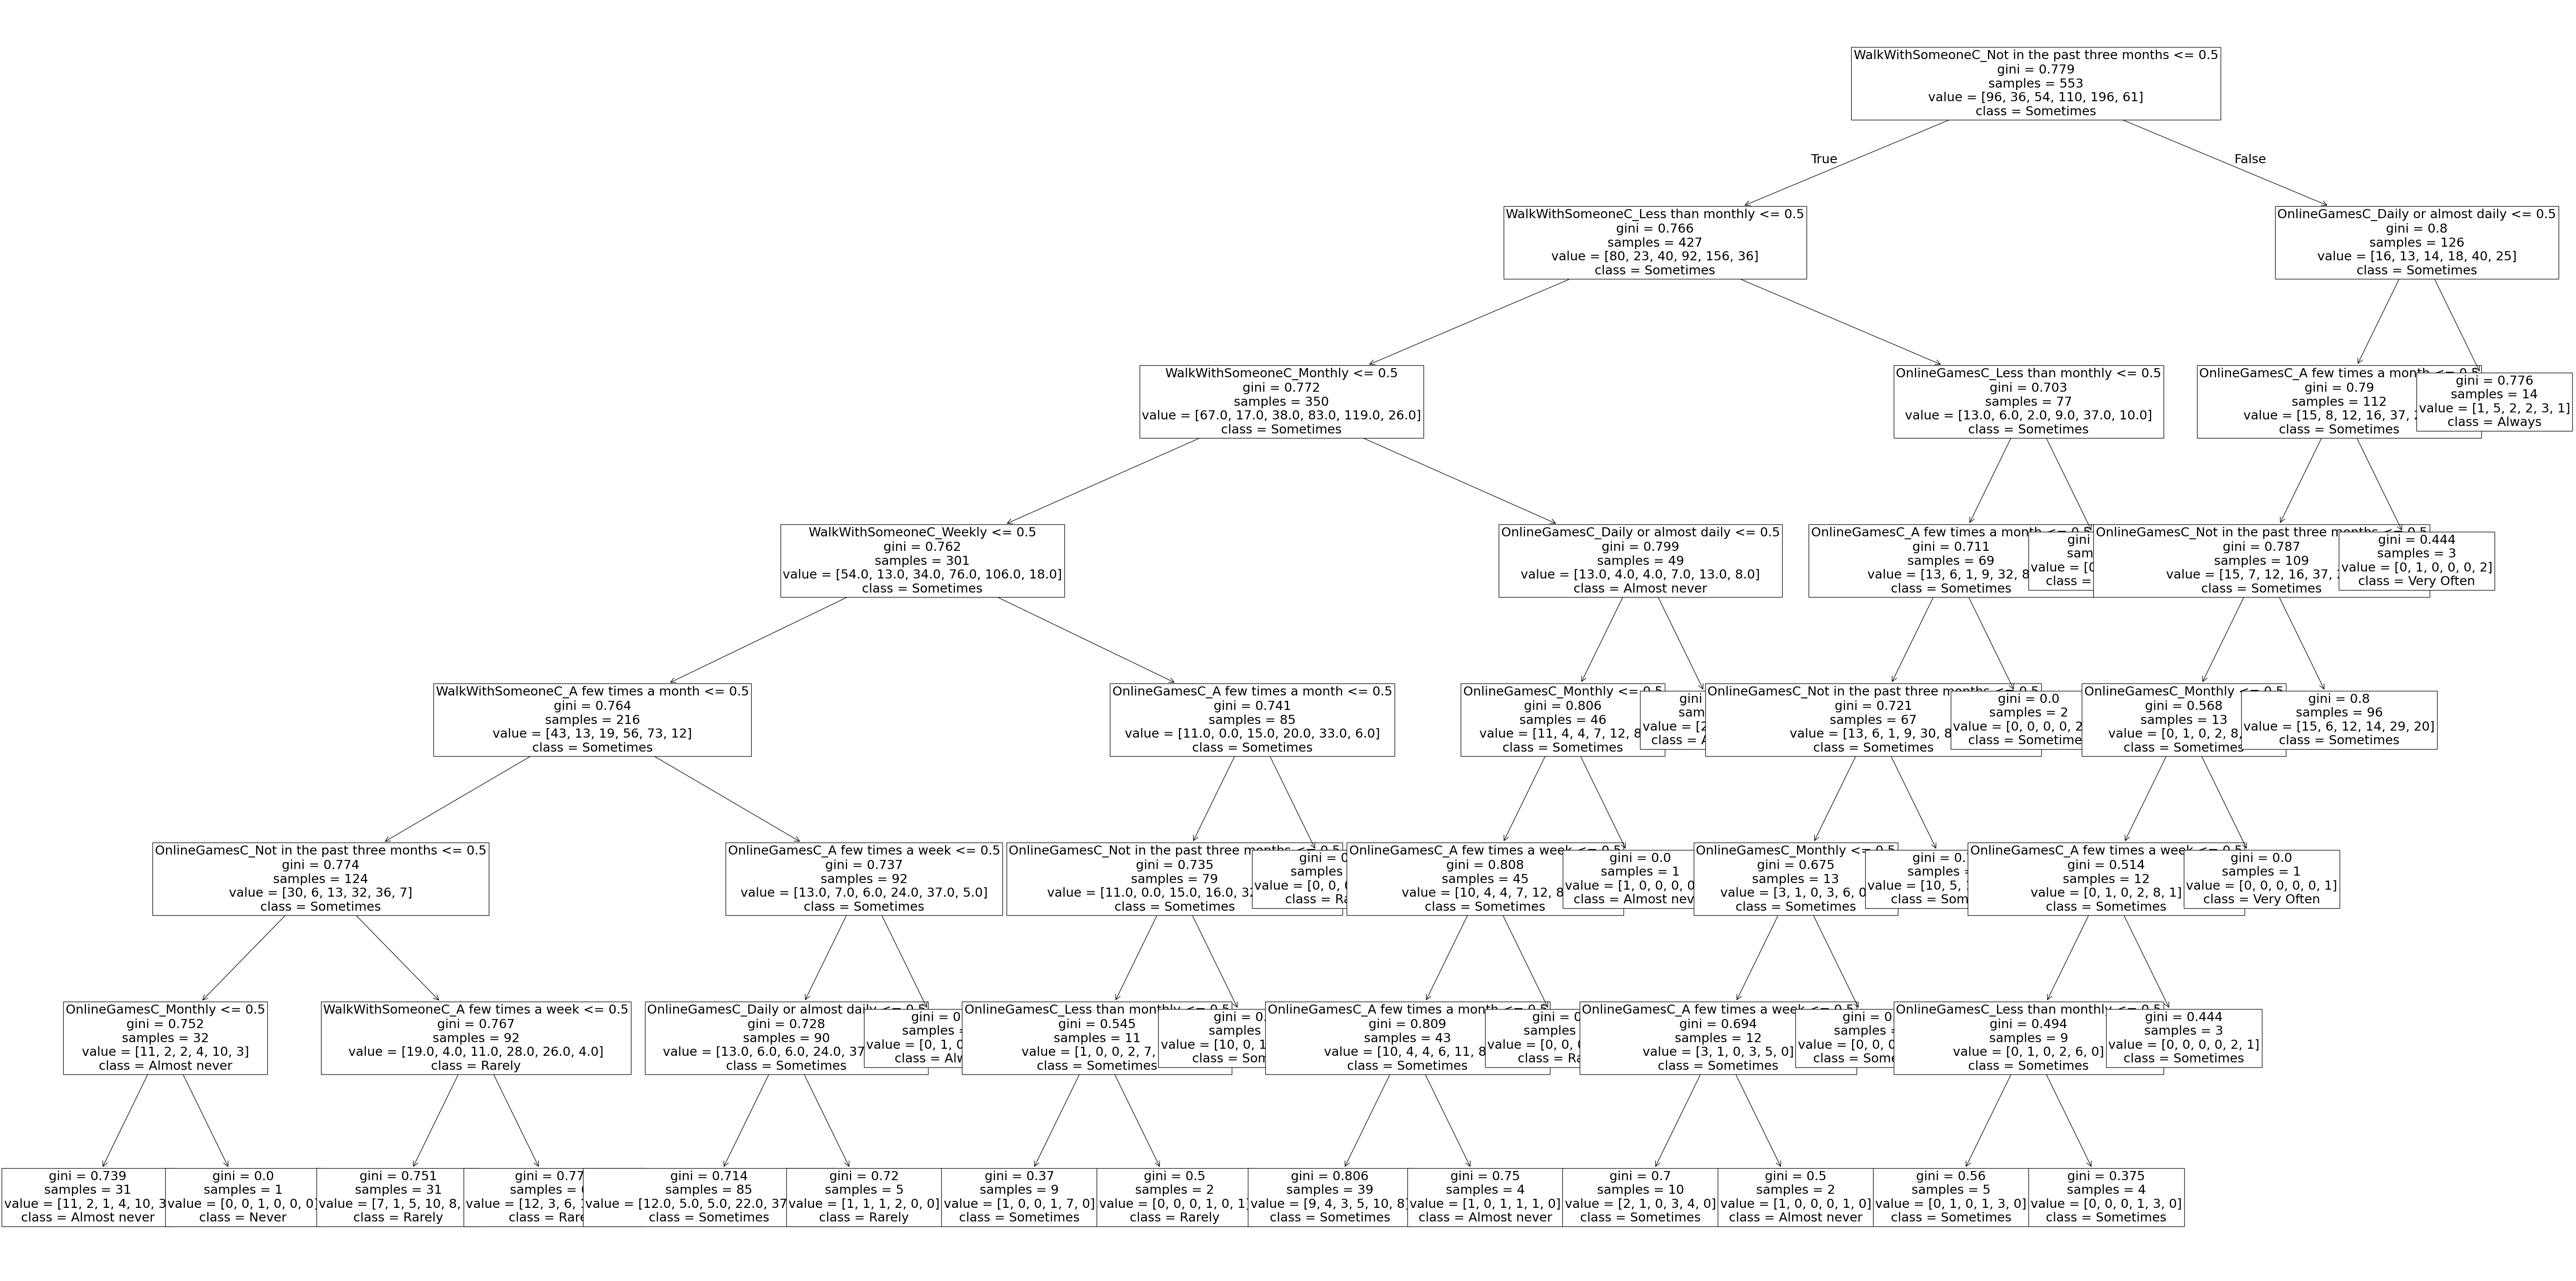

In [17]:
fig, ax = plt.subplots(figsize=(80, 40))
plot_tree(clf, ax=ax, fontsize=22, feature_names=X_train.columns, class_names=clf.classes_)
plt.show()

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


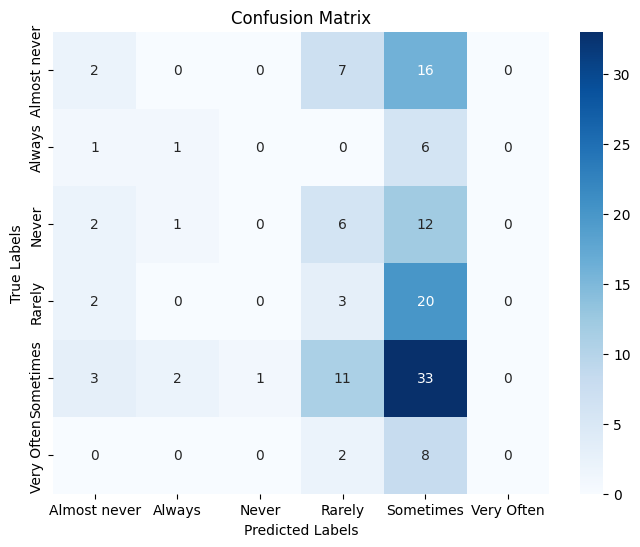

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
